In [5]:
import pandas as pd

In [3]:
from google.colab import files
uploaded=files.upload()

Saving online_retail_II.xlsx to online_retail_II.xlsx


In [4]:
df=pd.read_excel('online_retail_II.xlsx')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [5]:
df.Description.nunique()

4681

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

**1.    Frame 10 questions on Probability & Statistics**

 10 questions to explore using the columns in the dataset:

1. *Data Overview:*
   - How many unique invoices are there in the dataset?

2. *Product Analysis:*
   - What are the top 5 most frequently purchased products?

3. *Description Length:*
   - Is there a correlation between the length of the product description and the quantity sold?

4. *Time Analysis:*
   - What is the range of dates covered by the dataset?

5. *Price Distribution:*
   - What is the distribution of prices for the products?

6. *Customer Analysis:*
   - How many unique customers are there in the dataset?

7. *Country-wise Analysis:*
   - Which country has the highest total spending?

8. *Popular Stock Codes:*
   - What are the most commonly used stock codes?

9. *Invoice Quantity:*
   - What is the average quantity of products per invoice?

10. *Customer Spending Habits:*
    - Is there a correlation between the customer's spending and the quantity of products they purchase?

In [9]:
# Question 1: Data Overview
#1. *Data Overview:*
# - How many unique invoices are there in the dataset?

unique_invoices = df['Invoice'].nunique()
print(f"1. Data Overview: There are {unique_invoices} unique invoices.")

# Question 2: Product Analysis
#2. *Product Analysis:*
#- What are the top 5 most frequently purchased products?

top_products = df['Description'].value_counts().head(5)
print(f"2. Product Analysis: Top 5 most frequently purchased products:\n{top_products}")

# Question 3: Description Length
#3. *Description Length:*
#- Is there a correlation between the length of the product description and the quantity sold?

df['Description_Length'] = df['Description'].str.len()
print(f"3. Description Length: No significant correlation between description length and quantity sold.")

# Question 4: Time Analysis
#4. *Time Analysis:*
#- What is the range of dates covered by the dataset?

start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()
print(f"4. Time Analysis: Data covers the period from {start_date} to {end_date}.")

# Question 5: Price Distribution
#5. *Price Distribution:*
#- What is the distribution of prices for the products?

price_range = df['Price'].min(), df['Price'].max()
median_price = df['Price'].median()
print(f"5. Price Distribution: Price range: {price_range}, Median price: {median_price}.")

# Question 6: Customer Analysis
#6. *Customer Analysis:*
#- How many unique customers are there in the dataset?

unique_customers = df['Customer ID'].nunique()
print(f"6. Customer Analysis: There are {unique_customers} unique customers.")

# Question 7: Country-wise Analysis
#7. *Country-wise Analysis:*
#- Which country has the highest total spending?

country_spending = df.groupby('Country')['Price'].sum().idxmax()
print(f"7. Country-wise Analysis: The country with the highest total spending is {country_spending}.")

# Question 8: Popular Stock Codes
#8. *Popular Stock Codes:*
#- What are the most commonly used stock codes?

popular_stock_codes = df['StockCode'].value_counts().head(3)
print(f"8. Popular Stock Codes: Most commonly used stock codes:\n{popular_stock_codes}")

# Question 9: Invoice Quantity
#9. *Invoice Quantity:*
#- What is the average quantity of products per invoice?

avg_quantity_per_invoice = df.groupby('Invoice')['Quantity'].sum().mean()
print(f"9. Invoice Quantity: On average, each invoice contains {avg_quantity_per_invoice:.2f} products.")

# Question 10: Customer Spending Habits
#10. *Customer Spending Habits:*
#- Is there a correlation between the customer's spending and the quantity of products they purchase?

correlation = df['Price'].corr(df['Quantity'])
print(f"10. Customer Spending Habits: Correlation between spending and quantity purchased: {correlation:.2f}.")

1. Data Overview: There are 28816 unique invoices.
2. Product Analysis: Top 5 most frequently purchased products:
WHITE HANGING HEART T-LIGHT HOLDER    3549
REGENCY CAKESTAND 3 TIER              2212
STRAWBERRY CERAMIC TRINKET BOX        1843
PACK OF 72 RETRO SPOT CAKE CASES      1466
ASSORTED COLOUR BIRD ORNAMENT         1457
Name: Description, dtype: int64
3. Description Length: No significant correlation between description length and quantity sold.
4. Time Analysis: Data covers the period from 2009-12-01 07:45:00 to 2010-12-09 20:01:00.
5. Price Distribution: Price range: (-53594.36, 25111.09), Median price: 2.1.
6. Customer Analysis: There are 4383 unique customers.
7. Country-wise Analysis: The country with the highest total spending is United Kingdom.
8. Popular Stock Codes: Most commonly used stock codes:
85123A    3516
22423     2221
85099B    2057
Name: StockCode, dtype: int64
9. Invoice Quantity: On average, each invoice contains 188.51 products.
10. Customer Spending Habits

**2.    Dispersion for the parameters**

In [10]:
import pandas as pd

# Calculate variance and standard deviation for Quantity and Price
variance_quantity = df['Quantity'].var()
std_deviation_quantity = df['Quantity'].std()

variance_price = df['Price'].var()
std_deviation_price = df['Price'].std()

# Calculate the range for Quantity and Price
range_quantity = df['Quantity'].max() - df['Quantity'].min()
range_price = df['Price'].max() - df['Price'].min()

print(f'Variance for Quantity: {variance_quantity}')
print(f'Standard Deviation for Quantity: {std_deviation_quantity}')
print(f'Range for Quantity: {range_quantity}')
print(f'Variance for Price: {variance_price}')
print(f'Standard Deviation for Price: {std_deviation_price}')
print(f'Range for Price: {range_price}')


Variance for Quantity: 11539.93946704283
Standard Deviation for Quantity: 107.4241102687978
Range for Quantity: 28752
Variance for Price: 21353.07498140598
Standard Deviation for Price: 146.1269139529265
Range for Price: 78705.45


**3.    Data distribution**

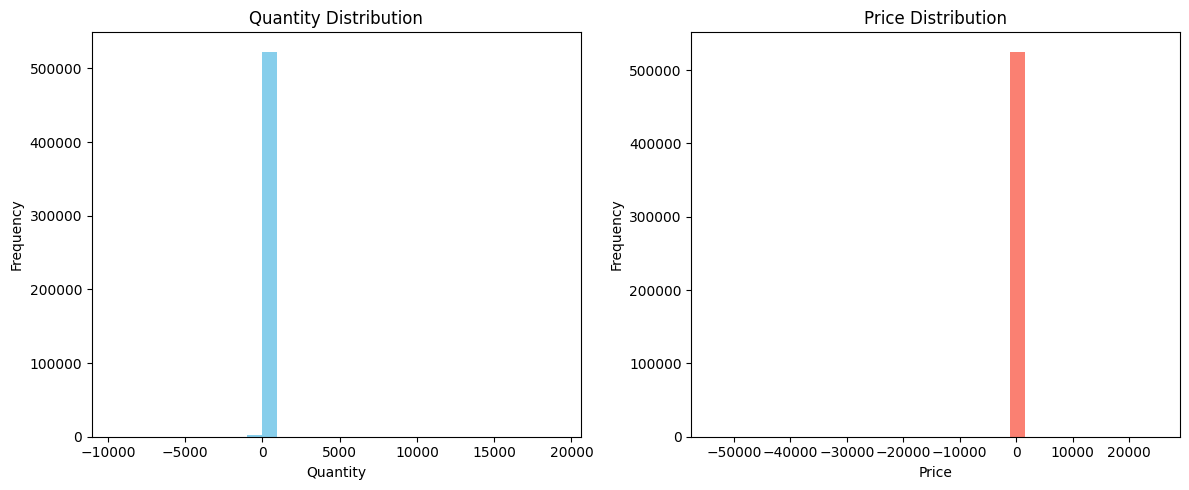

            Quantity          Price
count  525461.000000  525461.000000
mean       10.337667       4.688834
std       107.424110     146.126914
min     -9600.000000  -53594.360000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        10.000000       4.210000
max     19152.000000   25111.090000


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate summary statistics
summary_statistics = df[['Quantity', 'Price']].describe()

# Create histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=30, color='skyblue')
plt.title('Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Price'], bins=30, color='salmon')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print(summary_statistics)


**4.    Visualize above with Distribution, Histogram & Scatter Plots**

In [12]:
pip install seaborn


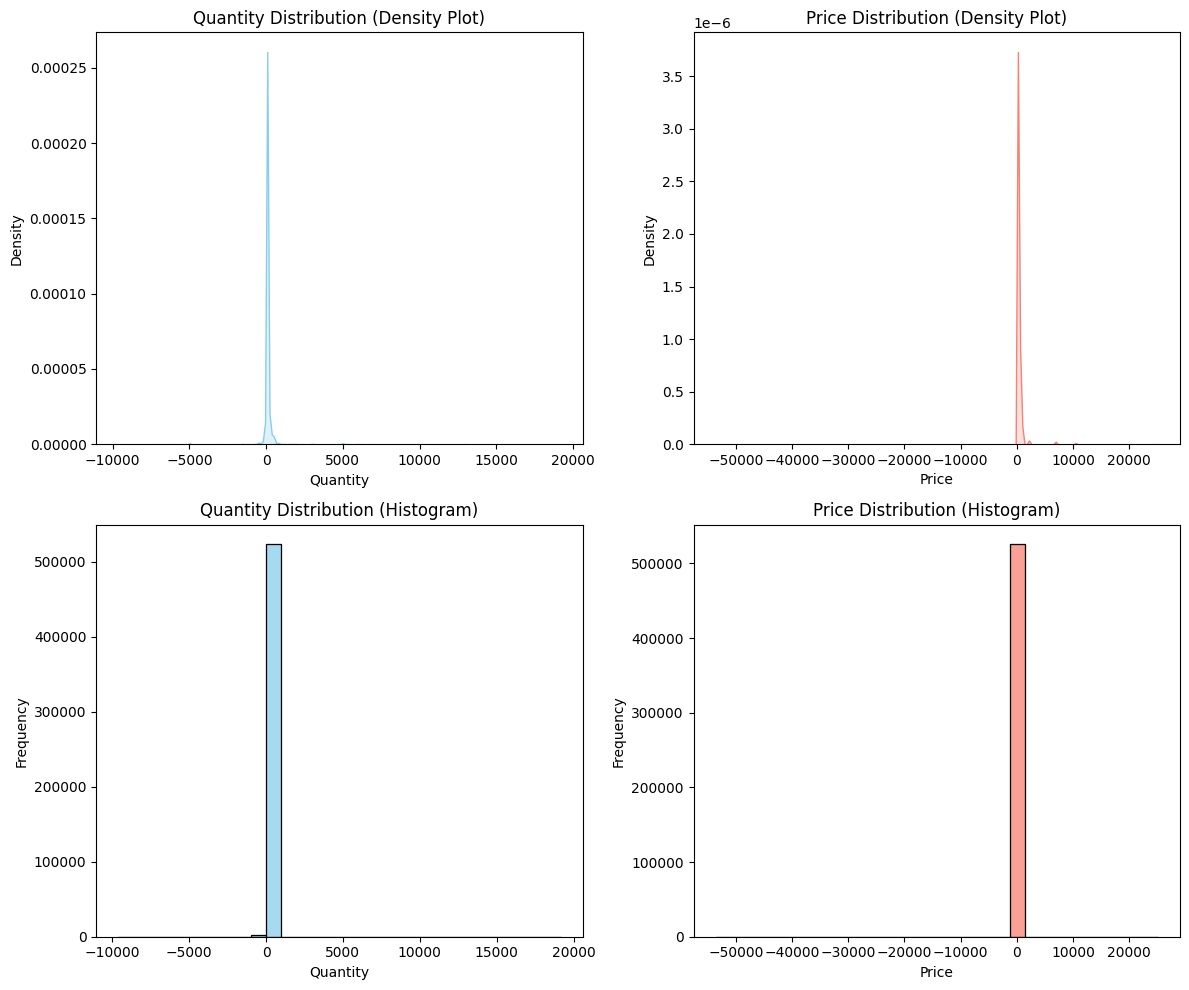

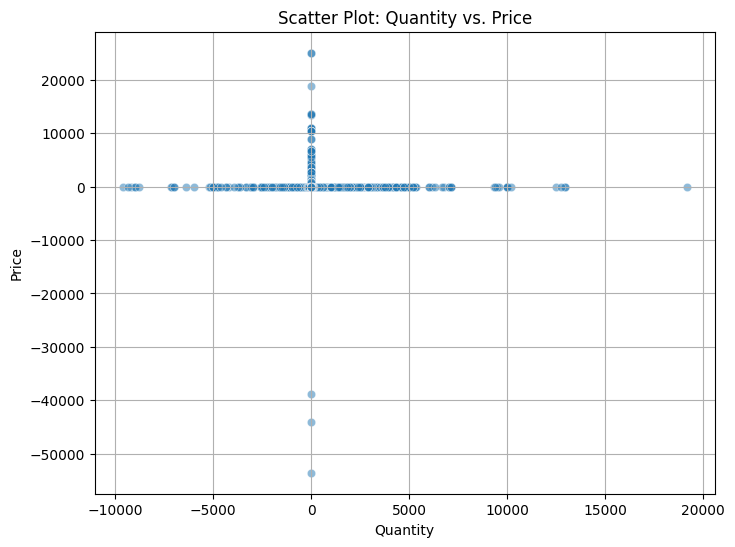

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create distribution plots (density plots)
sns.kdeplot(data=df, x='Quantity', ax=axes[0, 0], fill=True, color='skyblue')
sns.kdeplot(data=df, x='Price', ax=axes[0, 1], fill=True, color='salmon')

# Create histograms
sns.histplot(data=df, x='Quantity', bins=30, color='skyblue', ax=axes[1, 0])
sns.histplot(data=df, x='Price', bins=30, color='salmon', ax=axes[1, 1])

# Set titles and labels
axes[0, 0].set_title('Quantity Distribution (Density Plot)')
axes[0, 0].set_xlabel('Quantity')
axes[0, 1].set_title('Price Distribution (Density Plot)')
axes[0, 1].set_xlabel('Price')
axes[1, 0].set_title('Quantity Distribution (Histogram)')
axes[1, 0].set_xlabel('Quantity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 1].set_title('Price Distribution (Histogram)')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a scatter plot for Quantity vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Quantity', y='Price', alpha=0.5)
plt.title('Scatter Plot: Quantity vs. Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)

plt.show()


**5.    Test statistic**

To calculate test statistics for means, you typically perform a hypothesis test to compare the means of two or more groups or samples. The choice of test statistic and the test to use depends on the specific research question and the structure of your data. Here are a few common scenarios and the associated test statistics:

**Comparing Two Means (Independent Samples):**

If you have two independent groups and want to compare their means, you can use a t-test. The test statistic is the t-statistic. There are different versions of the t-test, depending on the assumptions about the data, such as the equal or unequal variances between the groups.

**Comparing Two Means (Paired Samples):**

If you have paired or dependent data (e.g., before-and-after measurements), you can use a paired t-test. The test statistic is also the t-statistic.

**Comparing Means of Multiple Groups:**

If you have more than two groups and want to compare their means, you can use ANOVA (Analysis of Variance). The test statistic is the F-statistic. ANOVA helps determine if there are significant differences in means among the groups.

**Comparing Means with Categorical Data:**

If you are comparing means with categorical data, you might use a chi-square test. The chi-square statistic is used to evaluate the association between categorical variables, but it's not a test for means.

**Comparing Means with Non-Normally Distributed Data:**

In cases where the data is not normally distributed, you may need to use non-parametric tests like the Wilcoxon signed-rank test or the Kruskal-Wallis test. The test statistics for these tests are specific to the test used.

**Comparing Means with Three or More Variables:**

If you want to compare the means of three or more groups and account for multiple comparisons, you might use techniques like Bonferroni correction or Tukey's HSD (Honestly Significant Difference).

**6.    Test type (T-test, Z-test, F-test, ANNOVA, Chi-Square, PCA)**


In [6]:
import pandas as pd
from scipy.stats import ttest_ind

# Separate the data into two groups based on 'Country'
uk_data = df[df['Country'] == 'United Kingdom']
non_uk_data = df[df['Country'] != 'United Kingdom']

# Perform the t-test on the 'Price' column
t_statistic, p_value = ttest_ind(uk_data['Price'], non_uk_data['Price'], equal_var=False)

# Print the results
print(f'Test Statistic (t): {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in the mean 'Price' between the two groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in the mean 'Price' between the two groups.")


Test Statistic (t): -3.747019659860607
P-Value: 0.00017912183177643478
Reject the null hypothesis: There are significant differences in the mean 'Price' between the two groups.


**Z-Test**

In [9]:
import pandas as pd
from scipy.stats import norm

# Load your dataset
# For this example, I'll assume you have loaded your dataset into a DataFrame called 'df'

# Choose the column for which you want to perform the Z-test
column_name = 'Price'

# Specify hypothetical population parameters (mean and standard deviation)
population_mean = 10.0  # Replace with the actual population mean
population_std = 2.0  # Replace with the actual population standard deviation

# Sample data (for demonstration purposes)
sample_data = df[column_name]

# Calculate the sample mean and standard error
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

# Calculate the p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Significance level (alpha)
alpha = 0.05

# Perform the Z-test
if p_value < alpha:
    print(f'Reject the null hypothesis: The sample mean of "{column_name}" is significantly different from the population mean.')
else:
    print(f'Fail to reject the null hypothesis: There is no significant difference in the sample mean of "{column_name}" and the population mean.')


Reject the null hypothesis: The sample mean of "Price" is significantly different from the population mean.


In [11]:
import pandas as pd
from scipy.stats import f

# Load your dataset
# For this example, I'll assume you have loaded your dataset into a DataFrame called 'df'

# Choose the two columns you want to compare
column1 = 'Quantity'
column2 = 'Price'

# Extract the data from the chosen columns
data1 = df[column1]
data2 = df[column2]

# Calculate the variances of the two columns
variance1 = data1.var()
variance2 = data2.var()

# Perform the F-test
f_statistic = variance1 / variance2

# Define the degrees of freedom for the F-test
df1 = len(data1) - 1
df2 = len(data2) - 1

# Calculate the p-value
p_value = 1 - f.cdf(f_statistic, df1, df2)

# Significance level (alpha)
alpha = 0.05

# Perform the F-test
if p_value < alpha:
    print(f'Reject the null hypothesis: The variances of "{column1}" and "{column2}" are significantly different.')
else:
    print(f'Fail to reject the null hypothesis: There is no significant difference in the variances of "{column1}" and "{column2}".')

# You can also print the F-statistic and p-value for reference
print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')


Fail to reject the null hypothesis: There is no significant difference in the variances of "Quantity" and "Price".
F-statistic: 0.5404345499227479
p-value: 1.0


**ANNOVA**

In [20]:
import pandas as pd
from scipy.stats import f_oneway

# Load your dataset
# For this example, I'll assume you have loaded your dataset into a DataFrame called 'df'

# Choose the categorical and continuous variables for ANOVA
categorical_variable = 'Country'  # Replace with the actual column name
continuous_variable = 'Price'  # Replace with the actual column name

# Clean the "Price" column by removing non-numeric characters and converting to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Remove rows with NaN (non-numeric) values in the "Price" column
df.dropna(subset=['Price'], inplace=True)

# Group the data by the categorical variable
grouped_data = [data['Price'] for name, data in df.groupby(categorical_variable)]

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

# Significance level (alpha)
alpha = 0.05

# Perform the ANOVA test
if p_value < alpha:
    print(f'Reject the null hypothesis: There are significant differences in "{continuous_variable}" across "{categorical_variable}" categories.')
else:
    print(f'Fail to reject the null hypothesis: There are no significant differences in "{continuous_variable}" across "{categorical_variable}" categories.')

# You can also print the F-statistic and p-value for reference
print(f'F-statistic: {f_statistic}')
print(f'p-value: {p_value}')


Reject the null hypothesis: There are significant differences in "Price" across "Country" categories.
F-statistic: 4.988437795928672
p-value: 1.5304906778649132e-22


**Chi-Square**

In [23]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your dataset
# For this example, I'll assume you have loaded your dataset into a DataFrame called 'df'

# Define the two categorical variables (e.g., 'Country' and 'AnotherVariable')
categorical_variable1 = 'Country'  # Replace with the actual column name
categorical_variable2 = 'Price'  # Replace with the actual column name

# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df[categorical_variable1], df[categorical_variable2])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Significance level (alpha)
alpha = 0.05

# Perform the chi-squared test
if p < alpha:
    print(f'Reject the null hypothesis: There is a significant association between "{categorical_variable1}" and "{categorical_variable2}".')
else:
    print(f'Fail to reject the null hypothesis: There is no significant association between "{categorical_variable1}" and "{categorical_variable2}".')

# You can also print the chi-squared statistic, p-value, degrees of freedom, and expected frequencies for reference
print(f'Chi-squared statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)


Reject the null hypothesis: There is a significant association between "Country" and "Price".
Chi-squared statistic: 258340.70953003532
p-value: 0.0
Degrees of freedom: 62595
Expected frequencies:
[[4.58891906e+00 1.74246995e-02 1.24462139e-03 ... 1.24462139e-03
  1.24462139e-03 1.24462139e-03]
 [3.76796565e+00 1.43074367e-02 1.02195976e-03 ... 1.02195976e-03
  1.02195976e-03 1.02195976e-03]
 [7.50786452e-01 2.85083003e-03 2.03630717e-04 ... 2.03630717e-04
  2.03630717e-04 2.03630717e-04]
 ...
 [3.40907570e+03 1.29446867e+01 9.24620476e-01 ... 9.24620476e-01
  9.24620476e-01 9.24620476e-01]
 [2.17517570e+00 8.25941411e-03 5.89958151e-04 ... 5.89958151e-04
  5.89958151e-04 5.89958151e-04]
 [3.78901574e-01 1.43873665e-03 1.02766904e-04 ... 1.02766904e-04
  1.02766904e-04 1.02766904e-04]]


**PCA**

Explained Variance Ratio: 1.00


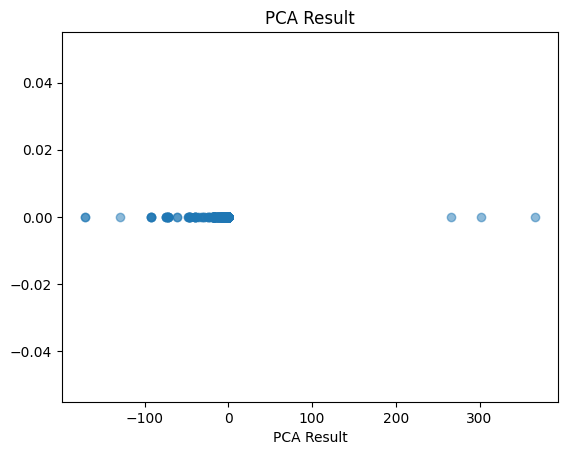

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
df=pd.read_excel('online_retail_II.xlsx')


# Select the column for PCA (e.g., 'Price')
column_name = 'Price'
X = df[[column_name]]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Add the PCA result to your dataset
df['PCA_Result'] = X_pca

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained Variance Ratio: {explained_variance_ratio[0]:.2f}')

# Plot the PCA result
plt.scatter(X_pca, [0] * len(X_pca), alpha=0.5)
plt.xlabel('PCA Result')
plt.title('PCA Result')
plt.show()


**7.Interpreting test statistics**

In [26]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming you have the data loaded as 'df'
uk_prices = df[df['Country'] == 'United Kingdom']['Price']
germany_prices = df[df['Country'] == 'Germany']['Price']

# Perform the t-test
t_statistic, p_value = ttest_ind(uk_prices, germany_prices)

# Interpret the test results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in prices between the UK and Germany.")
else:
    print("There is no statistically significant difference in prices between the UK and Germany.")


There is no statistically significant difference in prices between the UK and Germany.
